In [6]:
# Imports
import torch
import pandas as pd
import gymnasium as gym

from base_agent.dqn_agent import DQNAgent as BaseAgent
from utils import plot_episode_stats

In [50]:
import matplotlib.pyplot as plt

def plot_comparison_stats(based_stats, per_stats, smoothing_window=500, env_name="", title1="", title2=""):
    """
    Plots the smoothed episode rewards for two different sets of statistics.
    
    Parameters:
        based_stats: Stats object with 'episode_rewards' attribute (baseline stats).
        per_stats: Stats object with 'episode_rewards' attribute (performance stats).
        smoothing_window: The window size for smoothing the rewards.
    """
    fig, ax = plt.subplots(figsize=(10, 5), tight_layout=True)
    
    rewards_smoothed_based = based_stats["reward"].rolling(smoothing_window, min_periods=smoothing_window).mean()
    rewards_smoothed_per = per_stats["reward"].rolling(smoothing_window, min_periods=smoothing_window).mean()
    
    ax.plot(rewards_smoothed_based, label=f"Base Agent", color="blue")
    ax.plot(rewards_smoothed_per, label=f"Final Agent", color="red")
    
    ax.set_xlabel("Episode")
    ax.set_ylabel("Episode Reward (Smoothed)")
    ax.set_title(f"Final Agent")
    ax.legend()
    
    plt.show()

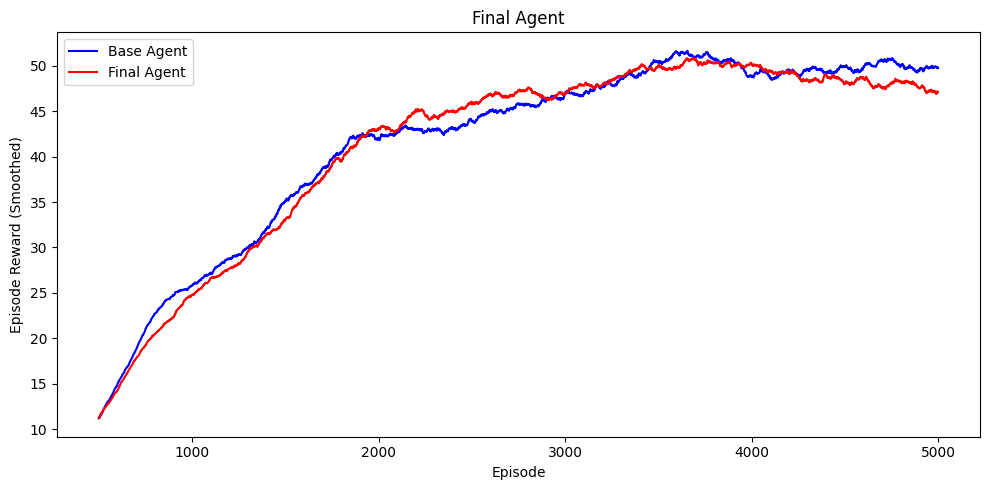

In [51]:
# Comparison plots 
import pandas as pd

base_stats = pd.read_csv("results/space_invaders_base.csv")[:5000]
per_stats = pd.read_csv("results/SpaceInvaders_final.csv")

plot_comparison_stats(base_stats, per_stats, smoothing_window=500, env_name="Space Invaders")

In [52]:
from utils import make_epsilon_greedy_policy

In [53]:
import gymnasium as gym
import torch
from final_agent.DuelingDQN import DuelingDQN as AgentQ

In [45]:
env = gym.make("MinAtar/SpaceInvaders-v1", render_mode="rgb_array")

agent_q = AgentQ(env.observation_space.shape, env.action_space.n)

checkpoint = torch.load('checkpoints/checkpoint_4000.pt')

# Load the model weights into the model
agent_q.load_state_dict(checkpoint['model_state_dict'])

/tmp/ipykernel_2947115/2906801818.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('checkpoints/checkpoint_4000.pt')


<All keys matched successfully>

In [55]:
import imageio
import numpy as np
from PIL import Image
import torch

def save_video_from_rgb(rgb_arrays, filename, duration=150, fps=30):
    """Save a video from a list of RGB arrays using imageio."""
    # Convert RGB arrays to frames
    frames = []
    for rgb_array in rgb_arrays:
        rgb_array = (rgb_array*255).astype(np.uint8)
        rgb_array = rgb_array.repeat(48, axis=0).repeat(48, axis=1)
        img = Image.fromarray(rgb_array)
        frames.append(np.array(img))

    # Write the frames as a video using imageio
    with imageio.get_writer(filename, mode='I', fps=fps) as writer:
        for frame in frames:
            writer.append_data(frame)

def rendered_rollout(policy, env, max_steps=1_000):
    """Rollout for one episode while saving all rendered images."""
    obs, _ = env.reset()
    imgs = [env.render()]

    for _ in range(max_steps):
        action = policy(torch.as_tensor(obs, dtype=torch.float32).unsqueeze(0))
        obs, _, terminated, truncated, _ = env.step(action)
        imgs.append(env.render())
        
        if terminated or truncated:
            break

    return imgs

# Example usage (assuming you've defined the `env` and `make_epsilon_greedy_policy`):
policy = make_epsilon_greedy_policy(agent_q, num_actions=env.action_space.n)
imgs = rendered_rollout(policy, env)

# Save the rendered frames as a video
save_video_from_rgb(imgs, "trained_video.mp4")


In [ ]:
agent = agent